
# Problem 1 - Kernel Methods vs. Linear Models in High Dimensions

**The kernel trick**

In many regression problems, linear models are insufficient to capture complex, nonlinear relationships between inputs and outputs. One common solution is to transform the inputs into a higher-dimensional feature space (e.g., $\phi(x)$) where the relationship becomes approximately linear. However, explicitly computing these transformations can be computationally expensive or even infeasible when the feature space is very high- or infinite-dimensional. 

Kernel methods offer an elegant solution to this problem. A kernel is a function that computes the inner product between two inputs as if they had been mapped into a high-dimensional feature space. Rather than working directly with transformed features $\phi(x)$, kernel methods rely on a kernel function $k(x, x') = \langle \phi(x), \phi(x') \rangle$. The inner product measures similarity between inputs in the high-dimensional feature space without ever computing $\phi(x)$ itself. Kernel methods leverage this property to perform computations implicitly in that space, enabling complex, nonlinear modeling without ever explicitly constructing the feature transformation.

This _kernel trick_ enables powerful nonlinear modeling using linear tools, and forms the foundation of kernel ridge regression and many other kernel-based learning algorithms.



## Setup and Assumptions

We consider sequences of problems indexed by the sample size $n$ and the dimension $p$. The high‑dimensional regime is given as follows:

A1. **Uniform data**: Training features are generated as $x_i = \Sigma_{p}^{1/2} z_i \in {\mathbb R}^{p}$ where $z_i \in {\mathbb R}^{p}$ has i.i.d. entries with ${\mathbb E} z_i = 0$, ${\mathbb E}|z_i|^2 = 1$, and ${\mathbb E}|z_i|^{5+\epsilon} < \infty$ for some $\epsilon > 0$.

This construction represents data drawn from a multivariate distribution with covariance structure $\Sigma_p$. The moment assumptions on $z_i$ ensure that the data have enough regularity (e.g., finite variance and higher moments) for asymptotic results to apply.

A test sample, $x_{\rm ts} = \Sigma_{p}^{1/2} z_{\rm ts}$, is generated similarly.

Further, the covariance matrix $\Sigma_p$ is positive definite with $\|\Sigma_{p}\|_2 = \mathcal{O}(1)$, and $\tau := \lim_{p\to\infty} {\rm tr}\left(\Sigma_{p}\right)/p < \infty$. These assumptions ensure that the covariance spectrum is well-behaved in the high-dimensional limit and that the average variance per feature remains bounded.

A2. **Proportional asymptotics**: Number of samples $n$ and number of input features $p$ scale as $p/n \,\to\, \beta \,\in\, (0,\infty)$.


A3. **Kernel**: The kernel function is of the form
$$
K(x_i,x_j) \;=\; g\;\left(\frac{\|x_i\|_2^{2}}{p},\;\frac{\langle x_i,x_j\rangle}{p},\;\frac{\|x_j\|_2^{2}}{p}\right),
$$
where $g$ is $C^1$ around $(\tau, \tau, \tau)$, $C^3$ around $(\tau, 0, \tau)$.

This kernel structure includes many popular kernels, like polynomial and RBF kernels, and normalizes inputs by the dimension $p$. The smoothness conditions on $g$ allow us to apply kernel concentration and asymptotic expansions in the high-dimensional limit.


**Linear Ridge Regression**  

Suppose we have $n$ data points $(x_i, y_i)$ for $i = 1, \ldots, n$ with $x_i \in \mathbb{R}^p$. Consider the linear model
$$
\hat{f}_{\rm lin}(x) = \hat{w}^\top x + \hat{b},
$$
fit using $\ell_2$-regularized least squares with separate regularization parameters $\lambda_{1}$ and $\lambda_{2}$ for the bias and the weights, respectively. That is,
$$\left(\hat{w}, \hat{b}\right) = {\rm arg\,min}_{w,b} J(w,b),$$ 

$$J(w,b):= \sum_{i=1}^{n} \left(y_i-w^{\top}x_i - b\right)^2 + \lambda_1 |b|^2 + \lambda_2 \|w\|^2.$$

We define the augmented design matrix $ \tilde{X} \in \mathbb{R}^{n \times (p+1)} $ and parameter vector $ \tilde{w} \in \mathbb{R}^{p+1} $ as follows:
$$
\tilde{X} = \begin{bmatrix} X & \mathbf{1} \end{bmatrix}, \quad
\tilde{w} = \begin{bmatrix} w \\ b \end{bmatrix},
$$
where $ \mathbf{1} \in \mathbb{R}^n $ is the vector of ones.

Let the regularization matrix $ \Lambda \in \mathbb{R}^{(p+1) \times (p+1)} $ be block diagonal:
$$
\Lambda = \begin{bmatrix}
\lambda_2 I_p & 0 \\
0 & \lambda_1
\end{bmatrix}.
$$

Then the solution has the closed-form:
$$
\tilde{w} = (\tilde{X}^\top \tilde{X} + \Lambda)^{-1} \tilde{X}^\top y.
$$

The optimal weights and bias are recovered as:
$$
\hat{w} = \tilde{w}_{1:p}, \quad \hat{b} = \tilde{w}_{p+1}.
$$

**Kernel Ridge Regression**

The {kernel ridge regression (KRR)} model $\hat{f}_{\rm krr}$ with regularization parameter $\lambda$ solves the optimization problem:
$$
\hat{f}_{\rm krr} = \underset{f \in \mathcal{H}}{\arg\min} \sum_{i=0}^{n} (y_i - f(x_i))^2 + \lambda \|f\|_{\mathcal{H}}^2,
$$
where $\|f\|_{\mathcal{H}} = \sqrt{\langle f, f \rangle_{\mathcal{H}}}$ is the norm induced by the reproducing kernel Hilbert space (RKHS) associated with the kernel $k$.

The solution has the form:
$$
\hat{f}_{\rm krr}(x) = \sum_{i=1}^n \alpha_i k(x_i, x),
$$
where the coefficients $\boldsymbol{\alpha} \in \mathbb{R}^{n+1}$ are given in closed form by:
$$
\boldsymbol{\alpha} = (K + \lambda I)^{-1} \mathbf{y},
$$
with $K \in \mathbb{R}^{n \times n}$ being the kernel (Gram) matrix defined by $K_{ij} = k(x_i, x_j)$, and $\mathbf{y} = [y_1, \dots, y_n]^\top$ the vector of target values.

In contrast to the linear case, kernel ridge regression allows us to model nonlinear relationships by implicitly mapping the input data into a high-dimensional feature space. The kernel function $k(x_i, x_j)$ measures similarity between inputs in this space without ever explicitly computing $\phi(x)$. This is known as the kernel trick, and it enables the model to learn complex patterns using the same optimization tools as in linear ridge regression.

Notice that learning occurs entirely in the kernel space, rather than in the original input or feature space, avoiding the need to explicitly represent a weight vector in high- or infinite-dimensional feature mappings.


## Exercise 1.1: Comparison of linear and kernel ridge regression

We will use a polynomial kernel of degree $d=2$ that has the following form

$$K\left(x,x'\right) = \left(\frac{\langle x,x'\rangle}{p} + c \right)^{2}$$

where $x,x' \in {\mathbb R}^p$, $p=1500$, and $c =0.1$ is a constant that adjusts the influence of higher degree terms and lower degree terms. 

We generate training data for $i= 1,2,\ldots,n$ as
$$ y_i=f^{*}(x_i)+\xi_i,\quad
x_i\sim\mathcal N(0,I_{p \times p}), \quad \xi_i\sim\mathcal N(0,\sigma^{2}),$$
where noise variance $\sigma^2 = 0.1$, and ground truth $f^{*}$ is a fully‑connected ReLU network with two hidden layers with $100$ hidden units each.

Complete the code below to train the following two models:

- Linear Ridge: set $\lambda_{1}$ to `lam1` and $\lambda_{2}$ to `lam2` as provided below
- Kernel Ridge: set $\lambda=\sigma^2=0.1$.
- Neural Network: 1 hidden layer, 100 hidden units, RELU activation in the hidden layers, MSE loss

Please compare these two models using the normalized MSE plot versus the sample size.

In [3]:
# ================================================================
# common imports and helpers for both problems
# ================================================================
import numpy as np, matplotlib.pyplot as plt, sympy as sp
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from tqdm import tqdm

# ---------- exact polynomial-kernel constants --------------------
p = 1500
sigma2 = 0.1
c_poly = 0.1

# Symbolic derivatives of g(a,b,c) = (b+c_poly)**2
a,b,c = sp.symbols('a b c', real=True)
g = (b + c_poly)**2
c2 = sp.diff(g, b).subs({a:1,b:0,c:1}).evalf()      # ∂g/∂b at (τ,0,τ), τ=1
c0 = (g.subs({a:1,b:1,c:1}) -
      g.subs({a:1,b:0,c:1}) -
      c2*np.trace(np.eye(p))/p)
c1 = (g.subs({a:1,b:0,c:1}) +
      sp.diff(g, b, 2).subs({a:1,b:0,c:1})*
      np.trace(np.eye(p)**2)/(2*p**2))

c0, c1, c2 = float(c0), float(c1), float(c2)

lam1 = (c0 + sigma2) / c1
lam2 = p * (c0 + sigma2) / c2


Problem 1.3: 100%|██████████| 7/7 [02:25<00:00, 20.75s/it]


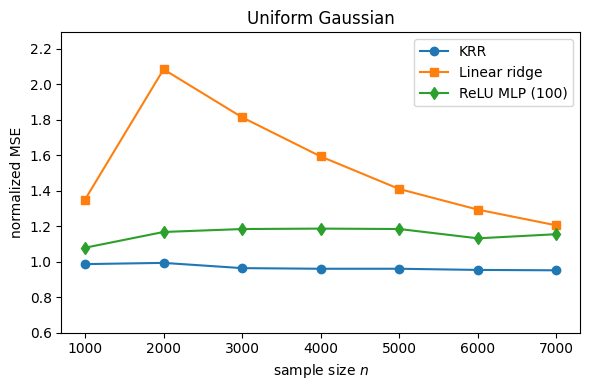

In [11]:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
from sklearn.kernel_ridge import KernelRidge
import torch.optim as optim

def sample_gp(X):
    K = poly_kernel(X) + 1e-6*np.eye(len(X))
    L = np.linalg.cholesky(K)
    return L @ np.random.randn(len(X))

def poly_kernel(X, degree=2, c=c_poly):
    # previously, Y=None. Just assume no Y input
    ### IMPLEMENT THIS FUNCTION ###
    K = ((X @ X.T) / p + c) ** degree
    return K 

def nmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred) / np.var(y_true)

def run_problem1(hidden_units=100, lr=1e-3, epochs=100, batch_size=64):
    ns = np.arange(1000, 7001, 1000)
    nmse_krr, nmse_lin, nmse_mlp, nmse_opt = [], [], [], []
    TEST_FRAC = 0.3

    for n in tqdm(ns, desc="Problem 1.3"):
        # --- generate GP data ---
        X = np.random.randn(n, p).astype(np.float32)
        f = sample_gp(X).astype(np.float32)
        y = f + np.random.normal(scale=np.sqrt(sigma2), size=n).astype(np.float32)

        # --- split ---
        X_tr, X_ts, y_tr, y_ts = train_test_split(
                                        X, y, test_size=TEST_FRAC, random_state=0)


        # --- Linear ridge ---
        ### Fit Linear Ridge Regression below ###
        lin_ridge = Ridge(alpha=lam1)
        lin_ridge.fit(X_tr, y_tr)
        y_pred_lin = lin_ridge.predict(X_ts)
        nmse_lin.append(nmse(y_ts, y_pred_lin))



        # --- KRR ---
        ### Fit Kernel Ridge Regression below ###
        KRR = KernelRidge(kernel='polynomial', degree=2, coef0=0.1, alpha=sigma2)
        KRR.fit(X_tr, y_tr)
        y_pred_krr = KRR.predict(X_ts)
        nmse_krr.append(nmse(y_ts, y_pred_krr))
                
        

        # --- 1-layer MLP (SGD + momentum) ---
        ### Fit NN below ###

        # 2. Define a custom Dataset
        class NumpyDataset(Dataset):
            def __init__(self, X, y):
                self.X = X.astype(np.float32)  # ensure float32 for PyTorch
                self.y = y.astype(np.float32)

            # required method in datasets
            def __len__(self):
                return len(self.X)

            # required method in datasets, given index idx, how do we access it?
            def __getitem__(self, idx):
                x = self.X[idx]
                y = self.y[idx]
                return x, y

        class SimpleNet(nn.Module):
            def __init__(self, input_dim, hidden_units):
                super().__init__()
                self.net = nn.Sequential(
                    nn.Linear(input_dim, hidden_units),
                    nn.ReLU(),
                    nn.Linear(hidden_units, 1)
                )
            def forward(self, x):
                return self.net(x)

        # Copied from above: Instantiate the dataset and wrap it with a DataLoader
        dataset = NumpyDataset(X_tr, y_tr)
        # randomly splits data into batches of size 16
        dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

        # Model as above
        model = SimpleNet(input_dim=p, hidden_units=hidden_units)
        # Loss function
        criterion = nn.MSELoss()
        # Stochastic Gradient Descent
        # other optimizers exist including Adam, RMSProp, Momentum
        optimizer = optim.SGD(model.parameters(), lr=0.01)
        
           
        model.train()
        for epoch in range(epochs):
            for xb, yb in dataloader:
                xb, yb = xb.float(), yb.view(-1, 1).float()
                optimizer.zero_grad()
                yhat = model(xb)
                loss = criterion(yhat, yb)
                loss.backward()
                optimizer.step()

        model.eval()
        with torch.no_grad():
            y_pred_mlp = model(torch.from_numpy(X_ts).float()).squeeze().numpy()
        nmse_mlp.append(nmse(y_ts, y_pred_mlp))
    
    # --- final plot ---
    plt.figure(figsize=(6,4))
    plt.plot(ns, nmse_krr, 'o-', label='KRR')
    plt.plot(ns, nmse_lin, 's-', label='Linear ridge')
    plt.plot(ns, nmse_mlp, 'd-', label=f'ReLU MLP ({hidden_units})')
    plt.xlabel('sample size $n$')
    plt.ylabel('normalized MSE')
    plt.title('Uniform Gaussian')
    plt.ylim(0.6, max(nmse_lin)*1.1)
    plt.legend(); plt.tight_layout(); plt.show()

if __name__ == "__main__":
    run_problem1(
        hidden_units=100,   # size of the single hidden layer
        lr=1e-3,            # SGD learning rate
        epochs=100,         # number of passes over the data
        batch_size=64       # mini-batch size
    )

Given the discussion on kernels above, is this expected? Why or why not?

I think that this is expected because linear ridge assumes linearity, while KRR and ReLU do not make such assumptions and can account for nonlinear relationships between outputs.

## Exercise 1.2: A Gaussian‑mixture counter‑example

The data are now drawn from a half-half mixture of two zero‑mean Gaussians with low‑rank covariances, which clearly violates assumption A1:

- $p=1500$
- rank of covariance of each component: $r=200$
- the covariance of each component
$$
\Sigma_c=S_cS_c^{\!\top},\quad S_c\in \mathbb R^{p\times r},
\;[S_c]_{ij}\stackrel{i.i.d.}{\sim}\mathcal N\!\left(0,\frac{1}{\sqrt{p}}\right).
$$
- the resulting covariance matrix
$$ \Sigma_x=\frac{1}{2}\Sigma_1 + \frac{1}{2}\Sigma_2$$

Please train two models as above:
- Linear Ridge: set $\lambda_{1}$ and $\lambda_{2}$ as above
- Kernel Ridge: set $\lambda=\sigma^2=0.1$.

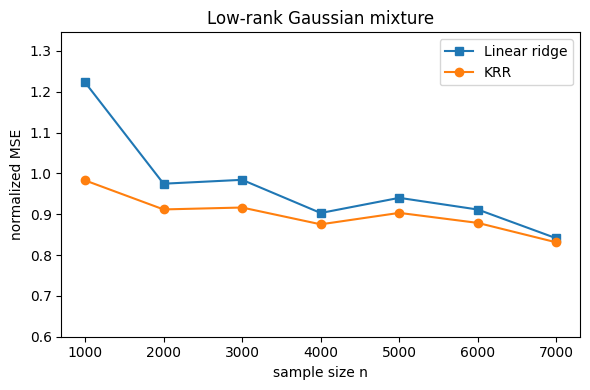

In [ ]:
def sample_mixture(n, r=200):
    # two rank-r covariances
    S1 = np.random.randn(p, r)/np.sqrt(p)
    S2 = np.random.randn(p, r)/np.sqrt(p)
    covs = [S1@S1.T, S2@S2.T]
    # sample equally from both
    X = np.vstack([
        np.random.multivariate_normal(np.zeros(p), covs[i], size=n//2)
        for i in [0,1]
    ]).astype(np.float32)
    return X

def run_problem2():
    ns = np.arange(1000, 7001, 1000)
    mse_krr, mse_lin = [], []
    TEST_FRAC = 0.3

    for n in ns:
        X = sample_mixture(n)
        f = sample_gp(X).astype(np.float32)
        y = (f + np.random.normal(scale=np.sqrt(sigma2), size=len(f))).astype(np.float32)

        X_tr, X_ts, y_tr, y_ts = train_test_split(X, y,
                                                 test_size=TEST_FRAC,
                                                 random_state=0)

        # --- Linear ridge ---
        ### Fit Linear Ridge Regression below ###
        lin_ridge = Ridge(alpha=lam1)
        lin_ridge.fit(X_tr, y_tr)
        y_pred_lin = lin_ridge.predict(X_ts)
        mse_lin.append(nmse(y_ts, y_pred_lin))



        # --- KRR ---
        ### Fit Kernel Ridge Regression below ###
        KRR = KernelRidge(kernel='polynomial', degree=2, coef0=0.1, alpha=sigma2)
        KRR.fit(X_tr, y_tr)
        y_pred_krr = KRR.predict(X_ts)
        mse_krr.append(nmse(y_ts, y_pred_krr))
    

    # plot
    plt.figure(figsize=(6,4))
    plt.plot(ns, mse_lin, 's-', label='Linear ridge')
    plt.plot(ns, mse_krr, 'o-', label='KRR')
    plt.xlabel('sample size n')
    plt.ylabel('normalized MSE')
    plt.title('Low-rank Gaussian mixture')
    plt.ylim(0.6, max(mse_lin)*1.1)
    plt.legend()
    plt.tight_layout()
    plt.show()

if __name__=="__main__":
    run_problem2()

Comment on whether these results relative to Problem 1 above. Compare the performance of these models and comment on how the data distribution differs from the assumptions in A1. What properties of the data might affect generalization in this case?


Linear ridge still performs worse, than KRR.  This data distibution is clustered around two subspaces and is low rank while it previously assumed uniformity.  Since it is in a lower dimensional subspace, the data is more simple to learn despite its non linear structure, which also affects generalization.

**Neural Tangent Kernels** 

Notice that we didn't train a neural network in the second case. The kernel you just used corresponds to the Neural Tangent Kernel (NTK) of a fully connected neural network with one hidden layer and infinite width. This means that, although you didn’t explicitly train a neural network, you effectively modeled what such a network would learn if it were trained with gradient descent and initialized randomly.

In this infinite-width limit, the neural network behaves like a kernel method, and the NTK captures how the network responds to small changes in its parameters. So by solving kernel ridge regression with this specific kernel, you’re mimicking the function learned by a neural net, but doing so analytically, in one step, and without iterative training.

This connection provides a surprising and powerful bridge between neural networks and kernel methods, and helps explain why the kernel you used performs well on data with structure that a neural network might naturally exploit.



## Extra Credit

**1.3 (Extra credit)** What is the closed‑form minimiser of kernel ridge regression?
(Hint: Apply the representer theorem for $\hat{f}_{krr}$)

Enter your solution below or attach as a PDF

**1.4. (extra credit)** Show that under Assumptions (A1-A3), if we use the same data to train $\hat{f}_{\rm krr}$ and $\hat{f}_{\rm lin}$ with $$\lambda_1 = \frac{c_0+\lambda}{c_1}, \qquad \lambda_2 = \frac{p(c_0+\lambda)}{c_2}, $$ where the constants $c_0$, $c_1$, $c_2$ are given by $$\begin{aligned}
c_2&=\partial_{z_2}g(\tau,0,\tau),\\
c_0&=g(\tau,\tau,\tau)-g(\tau,0,\tau)-c_2\,\frac{{\rm tr} (\Sigma_p)}{p},\\
c_1&=g(\tau,0,\tau)+ \partial_{z_2z_2}^2 g(\tau,0,\tau)\,
\frac{{\rm tr}\left(\Sigma_p^2\right)}{2 p^{2}} .
\end{aligned}$$
then at a test sample, $x_{\rm ts}$ drawn from the same distribution as the training samples, $$\left|\hat{f}_{\rm lin}(x_{\rm ts})− \hat{f}_{\rm krr}(x_{\rm ts})\right| \xrightarrow[n,p\to\infty]{\mathbb P} 0.$$

Hint: If $\mathbf{K}$ is a $n\times n$ kernel matrix such that assumptions (A1-A3)
hold, then
$$\|\mathbf{K} -\mathbf{M}\|_2 \xrightarrow[n,p\to\infty]{\mathbb P} 0,$$
where $\mathbf{M}= c_0 \mathbf{I} + c_1 \mathbf{11}^{\top} + c_2X X^{\top}$ where $c_0$, $c_1$, $c_2$ are defined above and $X \in {\mathbb R}^{n\times p}$ is the design matrix with samples $\{x_i\}$ as rows.

Enter your solution below or attach as a PDF.

# Survival Analysis


## Problem 2: A linear case

A Cox (proportional hazard) model for the rate of prostate cancer recurrence or death is given
by $$\log(h) = -1.04 \times \text{age} + 0.20 \times \text{smoking},$$ where age is in years, smoking is coded $0 = $ no, $1 = $ yes and $h$ is the prostate cancer (relative) hazard rate.

Overall, the two-year prostate cancer-free survival is $S(1) = 0.90$. The overall five-year prostate cancer-free survival is $S(5) = 0.75$.

The overall mean age in this population is $64$ years old, and $15\%$ of the population are smokers.

**2.1.** Indicate which is true about the overall median time to prostate cancer recurrence or death

- It is less than 5 years
- It is more than 5 years
- Cannot be determined



Type below or attach in PDF

It is more than five years because at the five year mark , there is a 0.75 cancer-free survival, which is greater than the median (0.5)

**2.2.** Give a formula for the hazard ratio (HR) for 70-year-old smokers compared to 50-year-old non-smokers.

Type below or attach in PDF

The hazard ratio (HR) comparing a 70-year-old smoker to a 50-year-old non-smoker is:

$$
\text{HR} = \frac{\exp(-1.04 \cdot 70 + 0.20 \cdot 1)}{\exp(-1.04 \cdot 50 + 0.20 \cdot 0)}
$$

$$
= \exp\left[(-1.04 \cdot 70 + 0.20) - (-1.04 \cdot 50)\right]
$$

$$
= \exp(-20.6)
$$

$$
\text{HR} = \exp(-20.6) = 1.13 \cdot 10^{-9}
$$


**2.3.** Give a formula for the hazard ratio for a “$k$” year increase in an age where smoking is constant (i.e., everyone is a smoker or everyone is a non-smoker). Does this formula depend on smoking?

Type below or attach in PDF

$$
\text{HR} = \frac{h(\text{age} + k)}{h(\text{age})}
= \frac{\exp(-1.04 \cdot (\text{age} + k) + 0.20 \cdot \text{smoking})}{\exp(-1.04 \cdot \text{age} + 0.20 \cdot \text{smoking})}
$$

$$
= \exp(-1.04k)
$$

$$
\text{HR} = \exp(-1.04k)
$$

This does **not** depend on smoking, since smoking is constant and cancels out.

**2.4.** Give formulas for the 2 and 5-year model-based risk of prostate cancer or death for those aged 70 who smoke and those aged 50 who do not smoke.

Type below or attach in PDF

70-year-old smoker
$$
-1.04 \cdot 70 + 0.20 = -72.6
$$

50-year-old non-smoker
$$
-1.04 \cdot 50 = -52.0
$$

avg
$$
1.04 \cdot 64 + 0.20 \cdot 0.15 = -66.56 + 0.03 = -66.53
$$

**Model-based 2-year survival**

- 70-year-old smoker:
$$
\lambda(2) = 1 - 0.90^{\exp(-72.6 + 66.53)} = 1 - 0.90^{\exp(-6.07)}
$$

- 50-year-old non-smoker:
$$
\lambda(2) = 1 - 0.90^{\exp(-52.0 + 66.53)} = 1 - 0.90^{\exp(14.53)}
$$

**Model-based 5-year survival**

- 70-year-old smoker:
$$
\lambda(5) = 1 - 0.75^{\exp(-6.07)}
$$

- 50-year-old non-smoker:
$$
\lambda(5) = 1 - 0.75^{\exp(14.53)}
$$


## Problem 3: A nonlinear Case

Load the dataset **sksurv.datasets.load_breast_cancer** for survival analysis

In [6]:
# ==============================================================
# 0. Imports & data
# ==============================================================
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sksurv.datasets import load_breast_cancer
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader


# loading the data
X_raw, y_struct = load_breast_cancer()  
T = y_struct["t.tdm"].astype(float) #time
E = y_struct["e.tdm"].astype(bool) #events

**3.1.** Plot the **Kaplan–Meier survival curve** for the entire cohort.  Report the median survival time (with $95\%$ CI).

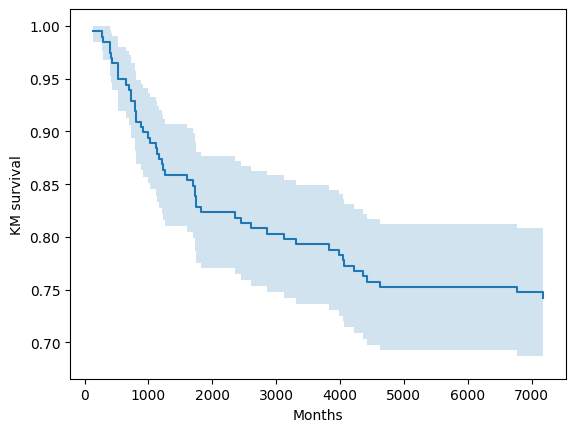

\hat{S}(60) = 0.742  95% CI [0.682, 0.803]


In [7]:
# =========================================
# (a) Kaplan–Meier from scratch
# =========================================
import numpy as np
import matplotlib.pyplot as plt

def km_curve(t, e, alpha=0.05):
    # sort times
    order = np.argsort(t)
    t, e = t[order], e[order]

    uniq, d, r = [], [], []


    ### IMPLEMENT THE KAPLAN-MEIER CURVE ###
    """
    Inputs: 
    - t: array of times
    - e: array of event (censoring) indicators (1=event)
    Output:

    Example usage:
        t_km, S_km, lo, up = km_curve(T, E)

    """
    n_at_risk = len(t)
    for time in np.unique(t[e == 1]):
        di = (t == time) & (e == 1)
        di = di.sum()
        uniq.append(time)
        d.append(di)
        r.append(n_at_risk)
        n_at_risk -= (t == time).sum()

    uniq  = np.asarray(uniq)
    d, r  = np.asarray(d), np.asarray(r)
    S     = np.cumprod(1 - d / r)
    var   = np.cumsum(d / (r * (r - d)))
    se    = S * np.sqrt(var)
    z     = 1.96                      # 95 %
    lower = np.maximum(S - z * se, 0)
    upper = np.minimum(S + z * se, 1)
    return uniq, S, lower, upper

t_km, S_km, lo, up = km_curve(T, E)

plt.step(t_km, S_km, where="post")
plt.fill_between(t_km, lo, up, step="post", alpha=0.2)
plt.xlabel("Months"), plt.ylabel("KM survival")
plt.show()

# 5-year (60 months) estimate
idx_60 = np.searchsorted(t_km, 60, side="right") - 1
print("\hat{S}(60) = %.3f  95%% CI [%.3f, %.3f]"
      % (S_km[idx_60], lo[idx_60], up[idx_60]))

**3.2. DeepSurv-style neural network**

Build a feed-forward network: $p \to  64 \to  32 \to1$ (linear risk score) and train it by minimising the Cox partial-log-likelihood. Train for 200 epochs, batch-size = 256, learning-rate = 1e-3; early-stop if validation loss stops decreasing for 15 epochs.
Please output 
* the Harrell C-index and
* the negative log-partial-likelihood.

In [15]:
# =========================================
# (b) DeepSurv neural net
# =========================================
import torch, torch.nn as nn, torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# one-hot & standardize
X = X_raw.copy()
for c in ["er", "grade"]:
    X[c] = X[c].astype(str)
X = pd.get_dummies(X, columns=["er","grade"], drop_first=True)
X = (X - X.mean()) / X.std()

# 1. Build stratified 80/20 indices
rng = np.random.default_rng(1)
# sample ~30% of events
test_ix = (rng.random(len(X)) < 0.2) & (E == True)
# sample ~20% of censored to balance
prop = 0.2 * (len(X) - E.sum()) / (len(X) - test_ix.sum())
test_ix |= (rng.random(len(X)) < prop) & (E == False)
train_ix = ~test_ix

# 2. Slice into train/test
X_train = X.loc[train_ix].values
X_test  = X.loc[test_ix].values

T_train = T[train_ix]
T_test  = T[test_ix]

E_train = E[train_ix]
E_test  = E[test_ix]

Xtr  = torch.tensor(X_train, dtype=torch.float32)
Xts  = torch.tensor(X_test,  dtype=torch.float32)
Ttr  = torch.tensor(T_train, dtype=torch.float32)
Etr  = torch.tensor(E_train.astype(np.float32))
Tts  = torch.tensor(T_test,  dtype=torch.float32)
Ets  = torch.tensor(E_test.astype(np.float32))

class DeepSurv(nn.Module):
    def __init__(self, p):
        super().__init__()
        # define layers of a neural network. in this case, one single layer
        self.net = nn.Sequential(
            nn.Linear(p, 100),
            nn.ReLU(),
            nn.Linear(100, 1)
        )

        
    def forward(self, x):
        # specify in what layer
        out = self.net(x)
        return out
    

def partial_ll(risk, t, e):
    ### Define Partial Log Likelihood loss
        order = torch.argsort(t, descending=True)
        t = t[order]
        e = e[order]
        risk = risk[order]

        log_total = torch.logcumsumexp(risk, dim=0)
        events = (e == 1)
        observed_risk = risk[events]
        observed_log_cumsum_exp = log_total[events]

        pll = observed_risk - observed_log_cumsum_exp

        return -pll.mean()
    
model = DeepSurv(Xtr.shape[1])
opt = optim.Adam(model.parameters(), 1e-3)

ds = TensorDataset(Xtr, Ttr, Etr)
loader= DataLoader(ds, batch_size=256, shuffle=True)

best_loss, patience = 1e9, 0
for epoch in range(1, 201):
    model.train()
    opt.zero_grad()

    # full-batch loss
    risk = model(Xtr)
    loss = partial_ll(risk, Ttr, Etr)
    loss.backward()

    # clip & step
    torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=5.0)
    opt.step()

    train_loss = loss.item()
    #print(f"Epoch {epoch:3d}: train loss = {train_loss:.4f}")

    # early stopping on full-batch val loss if you hold one out…
    # (omit mini-batch val here for brevity)

    # break if train_loss plateaus
    if train_loss < best_loss - 1e-3:
        best_loss, patience = train_loss, 0
    else:
        patience += 1
        if patience > 20:
            print("Stopping early.")
            break

# C-index
def c_index(risk, t, e):

    ### Implement c-index ###
    # C-index
    # note this implementation doens't account for ties
    num = den = 0
    for i in range(len(t)):
        for j in range(len(t)):
            if t[j] > t[i] and e[i]==1:
                den += 1
                num += (risk[j] < risk[i]).float()
    c = num/den

    return c


with torch.no_grad():
    risk_test = model(Xts)
print("Test log-PLL=%.2f   C-index=%.3f"
      % (best_loss/len(Tts), c_index(risk_test, Tts, Ets)))

Test log-PLL=0.02   C-index=0.749


## Extra Credit

**3.3. (Extra credit)** Net-vs-KM comparison at 5 years

Using the trained network:
* Estimate the baseline survival \hat S_0(t) via the Breslow method and obtain predicted survival curves
* Plot the average predicted survival curve for the test set and overlay the KM curve from 4.1.

In [ ]:
# # =========================================
# # (c) Net vs. KM on 5-year survival
# # =========================================
# # 1) get raw outputs and flip sign for true log-hazard ratio
# with torch.no_grad():
#     raw_train = model(torch.tensor(X_train, dtype=torch.float32)).numpy().flatten()
# eta_train = -raw_train    # <— flip sign
# Ttr, Etr = T_train, E_train.astype(int)

# # 2) Breslow baseline hazard on train
# times_train = np.unique(Ttr[Etr==1])






# # 3) predict average survival on test





# pred_surv =


# # 4) Kaplan–Meier on the test set
# t_km, S_km, lo_km, up_km = km_curve(T_test, E_test)

# # prepend (0,1) for plotting
# t0 = np.concatenate(([0], t_km))
# S0_km= np.concatenate(([1.0], S_km))

# # 5) Plotting
# plt.figure(figsize=(6,4))
# plt.step(times_train, pred_surv,  where="post", label="NN avg Ŝ(test)")
# plt.step(t0, S0_km, where="post", label="KM(test)", color="k", alpha=0.6)
# plt.fill_between(t0, np.concatenate(([1.0], lo_km)), np.concatenate(([1.0], up_km)),
#                  step="post", alpha=0.2, label="95% CI (KM)")

# plt.xlabel("Time (months)")
# plt.ylabel("Survival probability")
# plt.xlim(0, max(times_train.max(), t0.max())*1.05)
# plt.ylim(0.5,1.02)
# plt.legend()
# plt.tight_layout()
# plt.show()

# # 6) 5‑year survival comparison
# t5_idx_train = np.searchsorted(times_train, 60, side="right") - 1
# t5_idx_test  = np.searchsorted(t_km, 60, side="right") - 1

# print(f"NN avg 5‑yr Ŝ = {pred_surv[t5_idx_train]:.3f}")
# print(f"KM test 5‑yr Ŝ = {S_km[t5_idx_test]:.3f}")